In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Paths to dataset and labels
dataset_path = r"D:/content/drive/MyDrive/Datasett (Ferdig)"
labels_path = r"D:/content/drive/MyDrive/labels.csv"

# Load labels from CSV file
labels_df = pd.read_csv(labels_path)

# Function to get label for a specific image
def get_label(image_name):
    return labels_df[labels_df['images'] == image_name]['Depth (millimeter)'].values[0]

# List all image files in dataset directory
image_files = os.listdir(dataset_path)

# Extract image names without extensions
image_names = [os.path.splitext(file)[0] for file in image_files]

# Split dataset into train and test sets
train_names, test_names = train_test_split(image_names, test_size=0.2, random_state=42)

# Create dictionaries to store train and test labels
train_labels = {name: get_label(name) for name in train_names}
test_labels = {name: get_label(name) for name in test_names}

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, image_names, labels, dataset_path, transform=None):
        self.image_names = image_names
        self.labels = labels
        self.dataset_path = dataset_path
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.dataset_path, f"{image_name}.jpg")
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.labels[image_name]
        return image, label

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create custom datasets
train_dataset = CustomDataset(train_names, train_labels, dataset_path, transform=transform)
test_dataset = CustomDataset(test_names, test_labels, dataset_path, transform=transform)

# Define data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model architecture
model = torchvision.models.resnet18(pretrained=True)
# Modify the model for regression (replace the final fully connected layer)
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=1)

# Move model to device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}")

# Testing
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        test_loss += criterion(outputs.squeeze(), labels.float()).item()

print(f"Test Loss: {test_loss/len(test_loader)}")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Umerbutt/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [01:01<00:00, 763kB/s] 


Epoch 1/10, Train Loss: 3.606228828430176
Epoch 2/10, Train Loss: 2.1395716667175293
Epoch 3/10, Train Loss: 2.7298574447631836
Epoch 4/10, Train Loss: 0.8957648277282715
Epoch 5/10, Train Loss: 0.7868936657905579
Epoch 6/10, Train Loss: 1.0281237363815308
Epoch 7/10, Train Loss: 0.24471507966518402
Epoch 8/10, Train Loss: 0.18660317361354828
Epoch 9/10, Train Loss: 0.28380873799324036
Epoch 10/10, Train Loss: 0.23547682166099548
Test Loss: 1.0634919946843928


In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Paths to dataset and labels
dataset_path = r"D:/content/drive/MyDrive/Datasett (Ferdig)"
labels_path = r"D:/content/drive/MyDrive/labels.csv"

# Load labels from CSV file
labels_df = pd.read_csv(labels_path)

# Function to get label for a specific image
def get_label(image_name):
    return labels_df[labels_df['images'] == image_name]['Depth (millimeter)'].values[0]

# List all image files in dataset directory
image_files = os.listdir(dataset_path)

# Extract image names without extensions
image_names = [os.path.splitext(file)[0] for file in image_files]

# Split dataset into train and test sets
train_names, test_names = train_test_split(image_names, test_size=0.2, random_state=42)

# Create dictionaries to store train and test labels
train_labels = {name: get_label(name) for name in train_names}
test_labels = {name: get_label(name) for name in test_names}

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, image_names, labels, dataset_path, transform=None):
        self.image_names = image_names
        self.labels = labels
        self.dataset_path = dataset_path
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.dataset_path, f"{image_name}.jpg")
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.labels[image_name]
        return image, label

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create custom datasets
train_dataset = CustomDataset(train_names, train_labels, dataset_path, transform=transform)
test_dataset = CustomDataset(test_names, test_labels, dataset_path, transform=transform)

# Define data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define CNN model architecture using ResNet as feature extractor
class CNNResNet(nn.Module):
    def __init__(self):
        super(CNNResNet, self).__init__()
        # Load pre-trained ResNet
        resnet = torchvision.models.resnet18(pretrained=True)
        # Extract features from ResNet
        self.resnet_features = nn.Sequential(*list(resnet.children())[:-1])
        # Add additional layers for regression
        self.fc = nn.Linear(512, 1)  # ResNet18's output channels is 512

    def forward(self, x):
        # Extract features using ResNet
        features = self.resnet_features(x)
        # Flatten the features
        features = torch.flatten(features, 1)
        # Apply additional layers for regression
        output = self.fc(features)
        return output

# Initialize model
model = CNNResNet()

# Move model to device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}")

# Testing
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)
        outputs = model(inputs)
        test_loss += criterion(outputs.squeeze(), labels).item()

print(f"Test Loss: {test_loss/len(test_loader)}")


c:\Users\Umerbutt\.conda\envs\gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/10, Train Loss: 1.8094905614852905
Epoch 2/10, Train Loss: 1.458827257156372
Epoch 3/10, Train Loss: 3.4377174377441406
Epoch 4/10, Train Loss: 1.3391072750091553
Epoch 5/10, Train Loss: 0.8371859788894653
Epoch 6/10, Train Loss: 1.225928544998169
Epoch 7/10, Train Loss: 0.8103809356689453
Epoch 8/10, Train Loss: 0.1484261006116867
Epoch 9/10, Train Loss: 0.407441645860672
Epoch 10/10, Train Loss: 0.1471259593963623
Test Loss: 1.0116552710533142


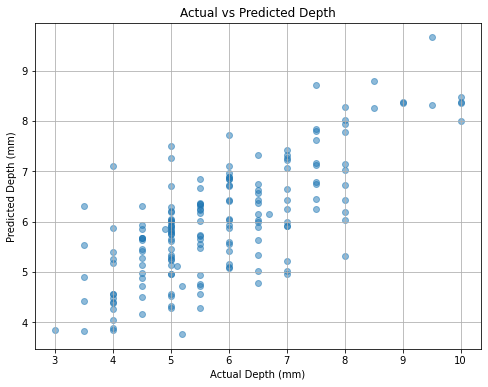

In [2]:
import matplotlib.pyplot as plt

# Initialize lists to store actual and predicted depth values
actual_depth = []
predicted_depth = []

# Switch model to evaluation mode
model.eval()

# Iterate through test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)
        outputs = model(inputs)
        # Append actual and predicted depth values to the lists
        actual_depth.extend(labels.cpu().numpy())
        predicted_depth.extend(outputs.squeeze().cpu().numpy())

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_depth, predicted_depth, alpha=0.5)
plt.title('Actual vs Predicted Depth')
plt.xlabel('Actual Depth (mm)')
plt.ylabel('Predicted Depth (mm)')
plt.grid(True)
plt.show()


Epoch 1/10, Train Loss: 0.34096671190372735
Epoch 2/10, Train Loss: 0.30611218477404395
Epoch 3/10, Train Loss: 0.32687508851982827
Epoch 4/10, Train Loss: 0.2593515742310258
Epoch 5/10, Train Loss: 0.26678333639405494
Epoch 6/10, Train Loss: 0.2678319159462008
Epoch 7/10, Train Loss: 0.21675746679999108
Epoch 8/10, Train Loss: 0.25289257945016375
Epoch 9/10, Train Loss: 0.2282994132229062
Epoch 10/10, Train Loss: 0.28879424236541573


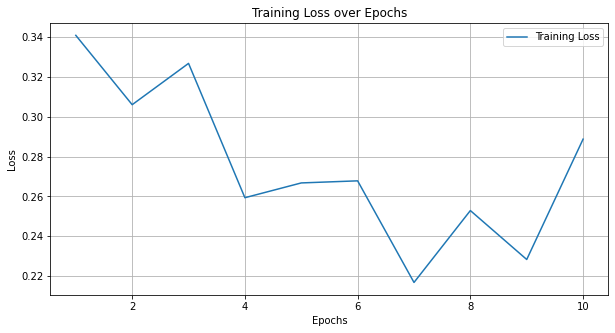

In [4]:
import matplotlib.pyplot as plt

# Initialize lists to store training loss values
train_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss}")

# Plotting the training loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
